In [1]:
#pip install graphviz

In [2]:
#Import the Dependencies
from sklearn.pipeline import Pipeline
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import norm
import statistics
import pandas_profiling
import pandas_profiling as pf
from pandas_profiling import ProfileReport

/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_58096/1946508069.py:19: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [3]:
fp=pd.read_csv('AdultUpdates.csv')

In [4]:
fp.head()

Age          workclass  fnlwgt    eduction  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital_Gain  Capital_Loss  hours_per_week  native_country  Income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [5]:
fp.tail()

Age      workclass  fnlwgt     eduction  education_num  \
32556   27        Private  257302   Assoc-acdm             12   
32557   40        Private  154374      HS-grad              9   
32558   58        Private  151910      HS-grad              9   
32559   22        Private  201490      HS-grad              9   
32560   52   Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation relationship    race      sex  \
32556   Married-civ-spouse        Tech-support         Wife   White   Female   
32557   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32558              Widowed        Adm-clerical    Unmarried   White   Female   
32559        Never-married        Adm-clerical    Own-child   White     Male   
32560   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       Capital_Gain  Capital_Loss  hours_per_week  native_country  Income  
32556             0             0              38   United-States   <=50K  
32557             0             0              40   United-States    >50K  
32558             0             0              40   United-States   <=50K  
32559             0             0              20   United-States   <=50K  
32560         15024             0              40   United-States    >50K

In [6]:
fp.shape

(32561, 15)

In [7]:
fp.groupby('marital_status').count()

Age  workclass  fnlwgt  eduction  education_num  \
marital_status                                                              
 Divorced                4443       4443    4443      4443           4443   
 Married-AF-spouse         23         23      23        23             23   
 Married-civ-spouse     14976      14976   14976     14976          14976   
 Married-spouse-absent    418        418     418       418            418   
 Never-married          10683      10683   10683     10683          10683   
 Separated               1025       1025    1025      1025           1025   
 Widowed                  993        993     993       993            993   

                        occupation  relationship   race    sex  Capital_Gain  \
marital_status                                                                 
 Divorced                     4443          4443   4443   4443          4443   
 Married-AF-spouse              23            23     23     23            23   
 Married-civ-spouse          14976         14976  14976  14976         14976   
 Married-spouse-absent         418           418    418    418           418   
 Never-married               10683         10683  10683  10683         10683   
 Separated                    1025          1025   1025   1025          1025   
 Widowed                       993           993    993    993           993   

                        Capital_Loss  hours_per_week  native_country  Income  
marital_status                                                                
 Divorced                       4443            4443            4443    4443  
 Married-AF-spouse                23              23              23      23  
 Married-civ-spouse            14976           14976           14976   14976  
 Married-spouse-absent           418             418             418     418  
 Never-married                 10683           10683           10683   10683  
 Separated                      1025            1025            1025    1025  
 Widowed                         993             993             993     993

In [8]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   eduction        32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
fp['Income'].value_counts()

Income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [10]:
fp.describe()

Age        fnlwgt  education_num  Capital_Gain  Capital_Loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [11]:
fp.isnull().sum()

Age               0
workclass         0
fnlwgt            0
eduction          0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
Capital_Gain      0
Capital_Loss      0
hours_per_week    0
native_country    0
Income            0
dtype: int64

In [12]:
fp.duplicated().sum()

24

In [13]:
fp.drop_duplicates(inplace=True)

In [14]:
fp.duplicated().sum()

0

<Axes: xlabel='Age', ylabel='count'>

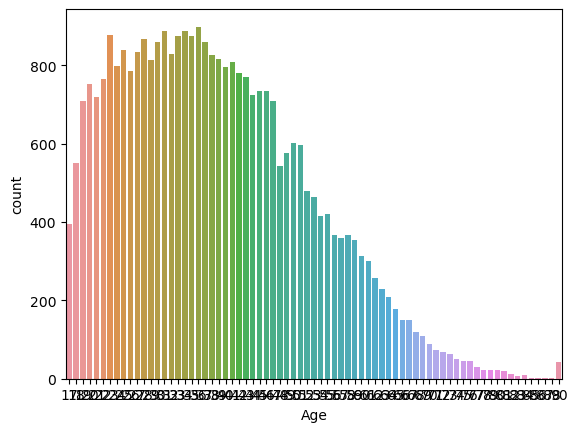

In [16]:
sns.countplot(x="Age",data=fp)

<Axes: xlabel='workclass', ylabel='count'>

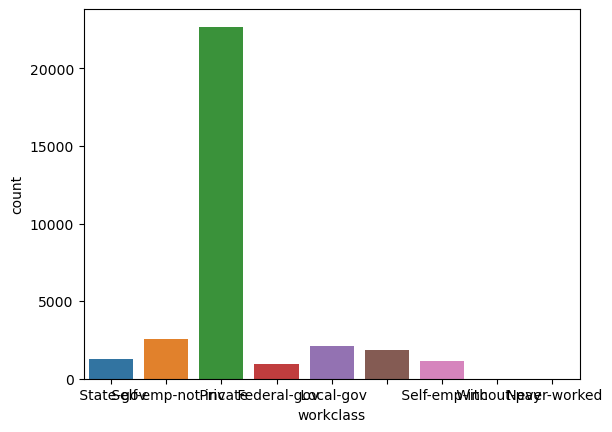

In [17]:
sns.countplot(x="workclass",data=fp)

/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


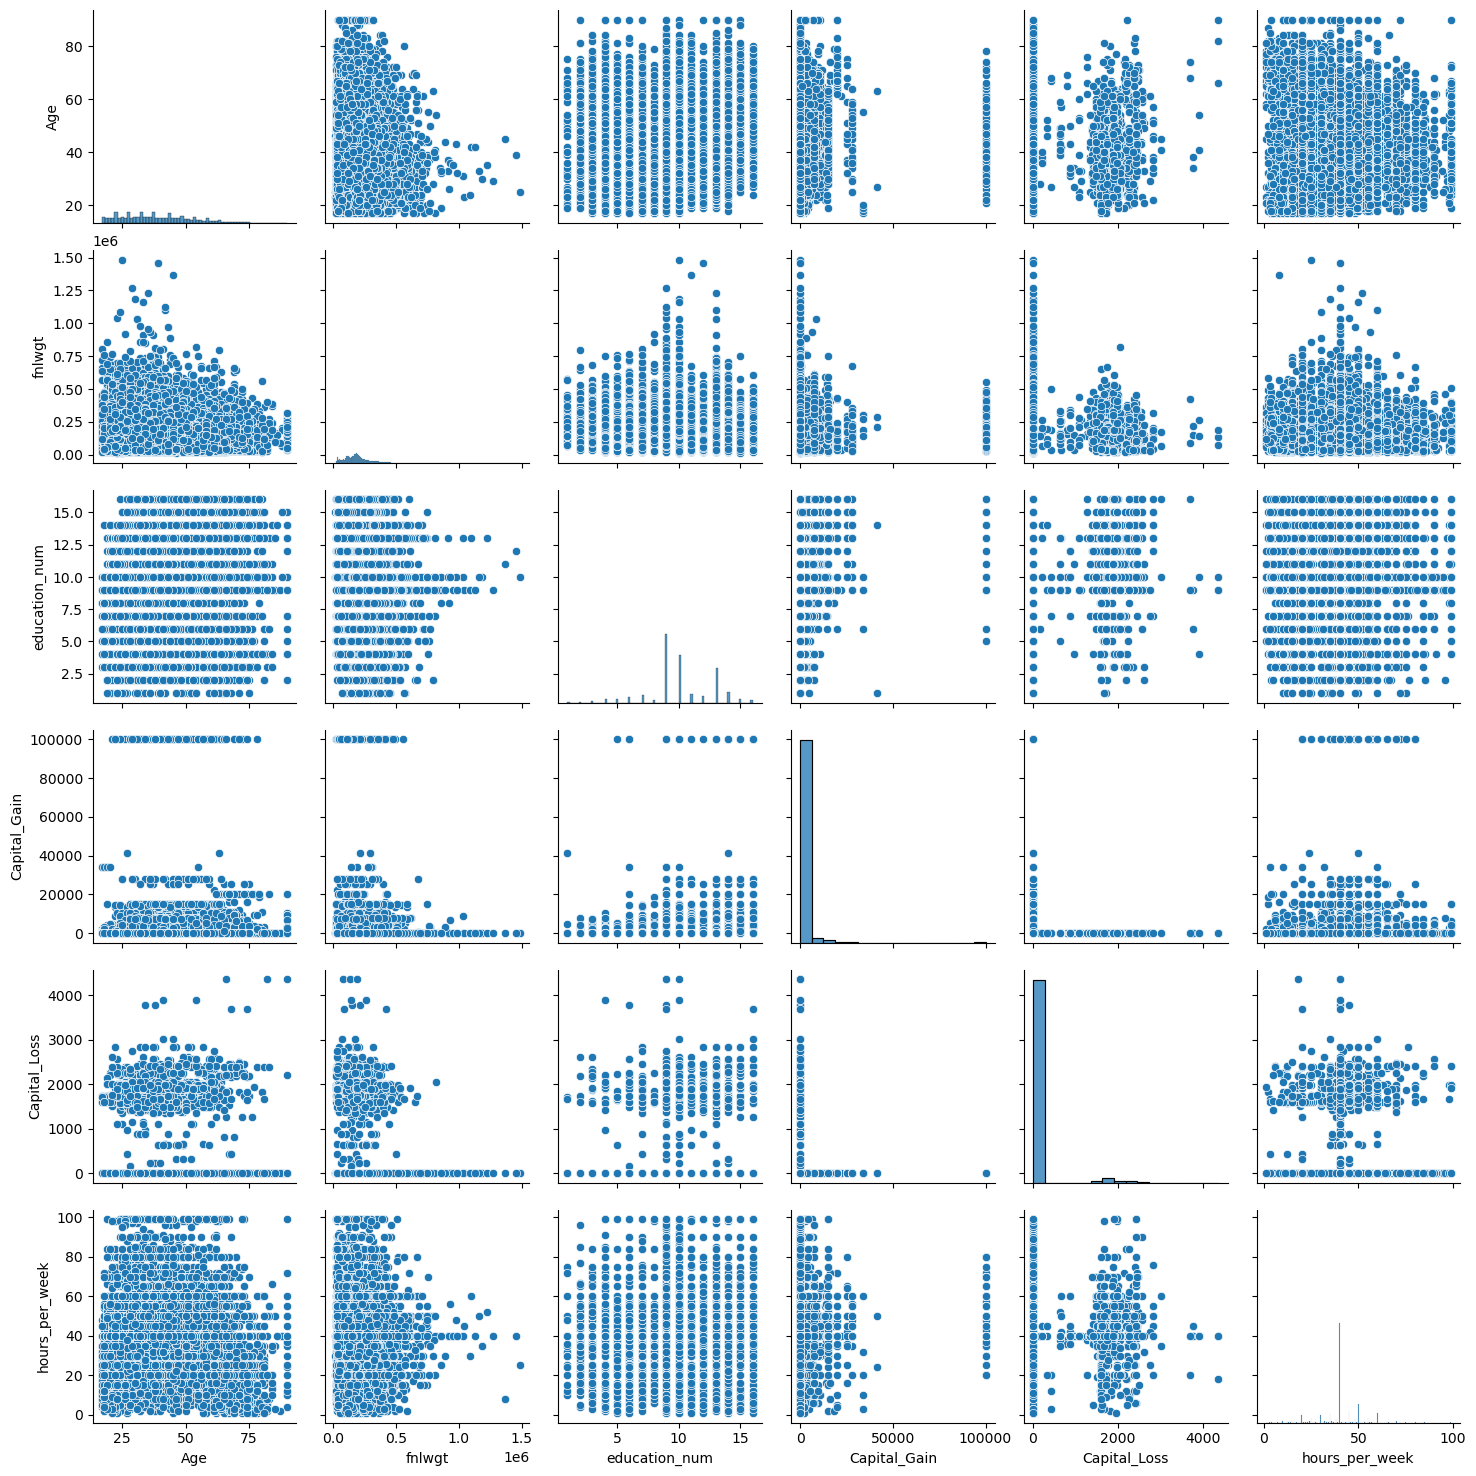

In [18]:
sns.pairplot(fp)

In [ ]:
# plt.figure(figsize=(30,30))
# sns.heatmap(fp.corr(),cbar=True,square=True,fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')

/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The 

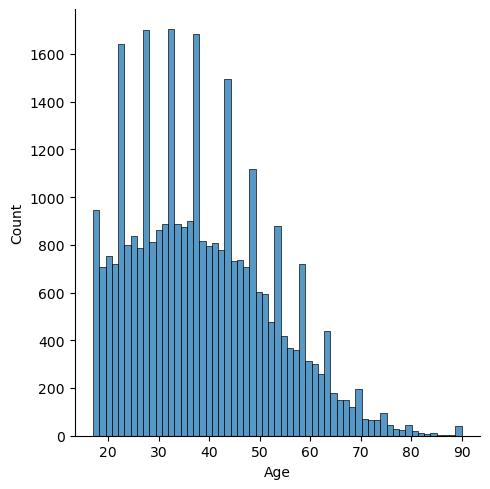

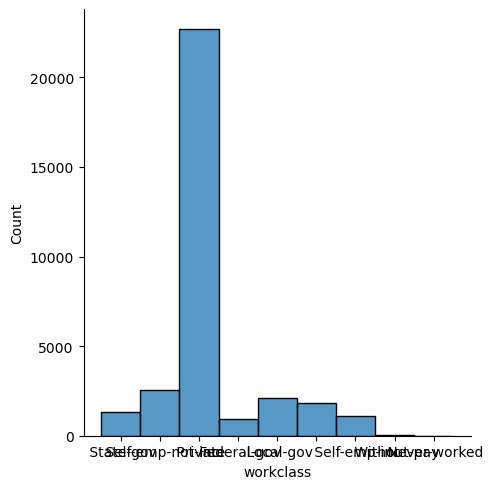

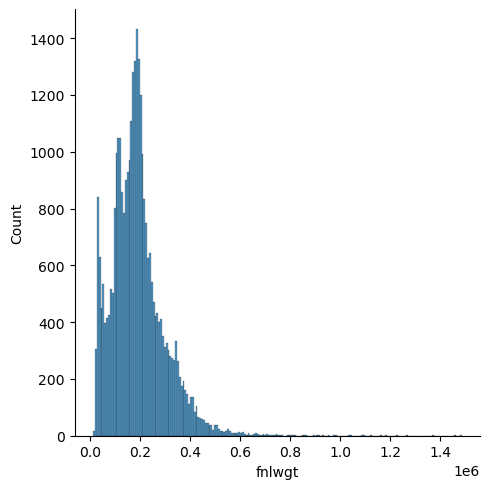

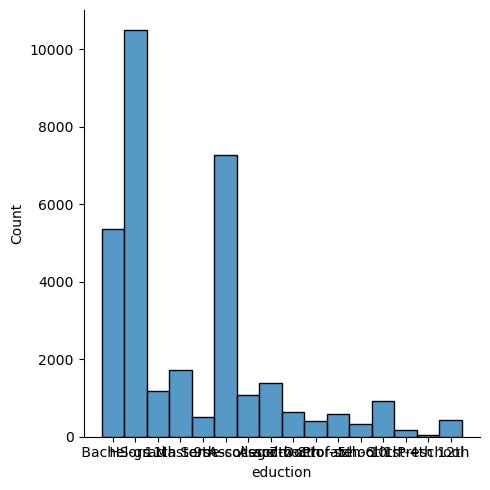

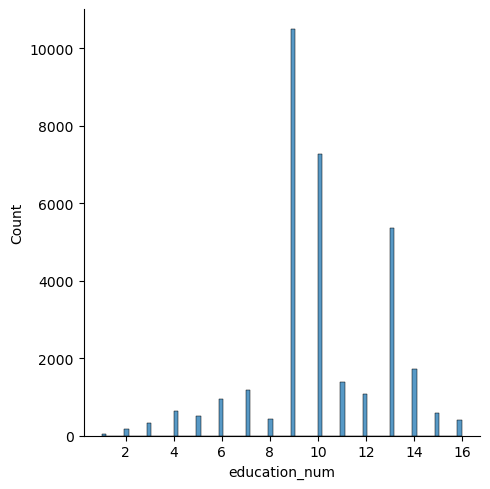

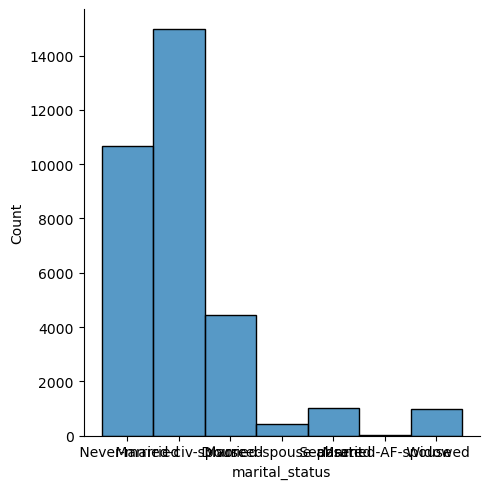

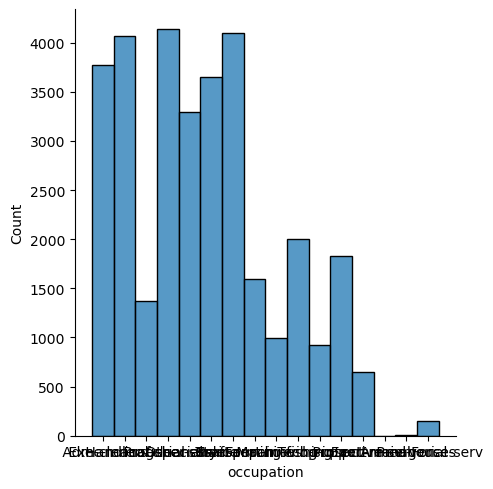

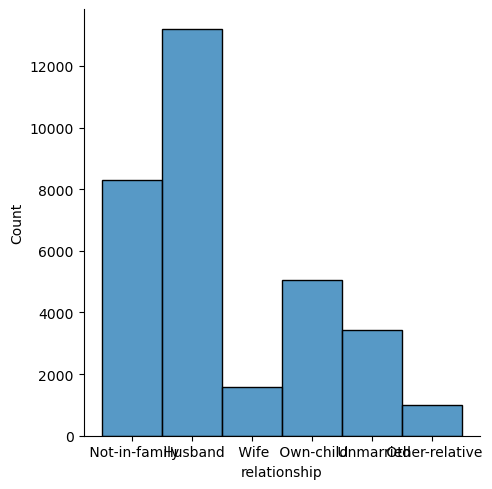

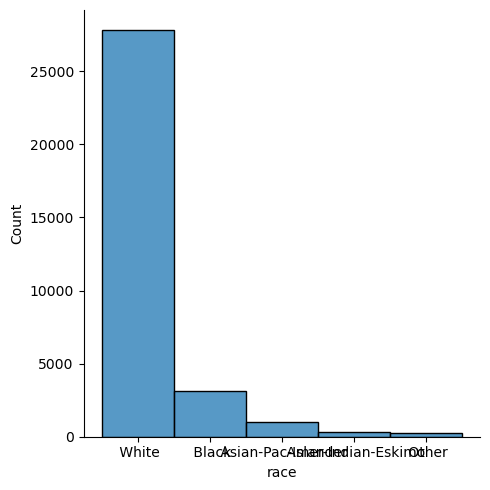

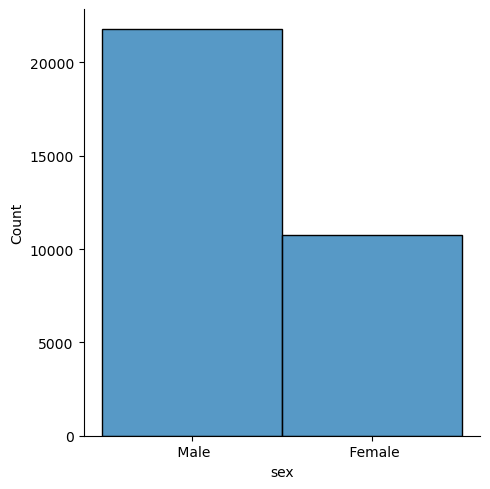

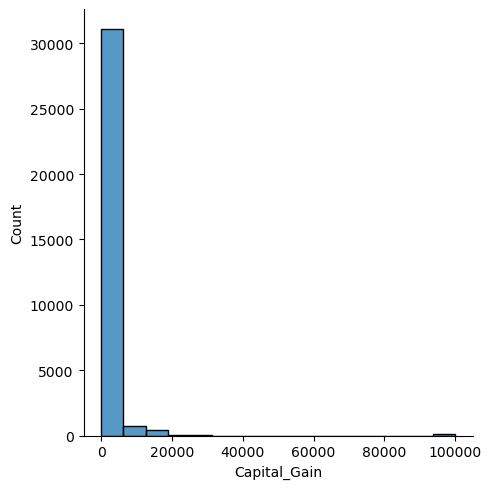

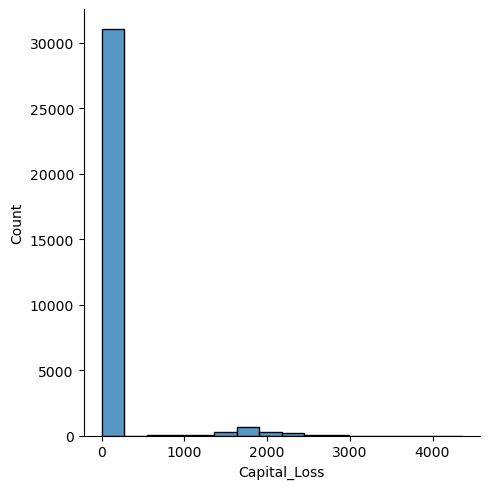

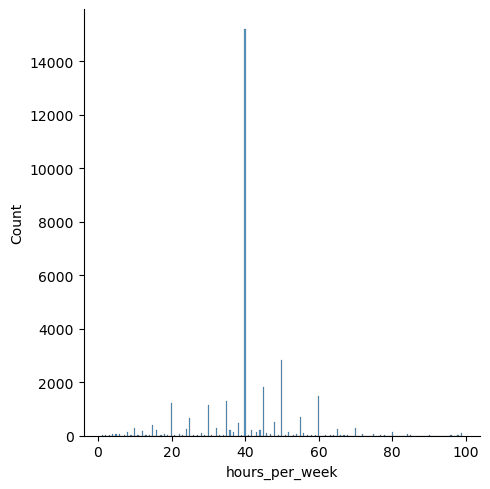

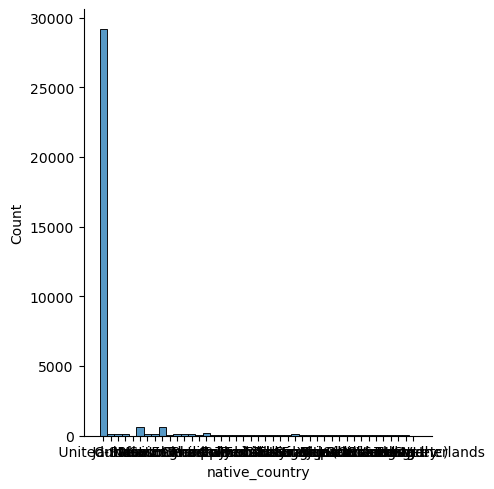

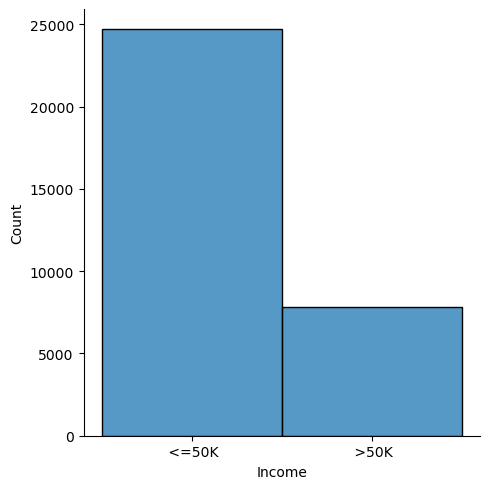

In [19]:
#creating for loop to get the distributon plot for all columns
for columns in fp:
    sns.displot(x=columns,data=fp)

In [20]:
#fp['marital_status'].std()

TypeError: could not convert string to float: ' Never-married'

In [21]:
#or uuse sns for barplot
#sns.boxplot(x='Income',y="marital_status",data=fp)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
#or uuse sns for barplot
#sns.barplot(x='Target',y="Marital status",hue='Target',data=fp)

In [ ]:
#or uuse sns for barplot
#sns.barplot(x='Target',y="Debtor",hue='Target',data=fp)

In [ ]:
#or uuse sns for barplot
#sns.barplot(x='Target',y="Course",hue='Target',data=fp)

In [ ]:
#sns.barplot(x='Target',y="Inflation rate",hue='Target',data=fp)

In [ ]:
#sns.barplot(x='Target',y="Unemployment rate",hue='Target',data=fp)

In [ ]:
#sns.barplot(x='Target',y="Daytime/evening attendance",hue='Target',data=fp)

In [ ]:
#sns.barplot(x='Target',y="Gender",hue='Target',data=fp)

In [22]:
#sns.barplot(x='Target',y="International",hue='Target',data=fp)

In [23]:
kk=pandas_profiling.ProfileReport(fp)

In [24]:
kk

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
kk.to_file("Output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
fp['Income'].value_counts()

Income
 <=50K    24698
 >50K      7839
Name: count, dtype: int64

In [27]:
label_encode=LabelEncoder()
labels=label_encode.fit_transform(fp['Income'])
print(labels)
fp['Income']=labels
fp

[0 0 0 ... 0 0 1]


Age          workclass  fnlwgt     eduction  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  Capital_Gain  Capital_Loss  hours_per_week  native_country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       Income  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
32556       0  
32557       1  
32558       0  
32559       0  
32560       1  

[32537 rows x 15 columns]

# {0:<=50K,1:>50k}

In [28]:
labels=label_encode.fit_transform(fp['workclass'])
print(labels)
fp['workclass']=labels
fp

[7 6 4 ... 4 4 5]


Age  workclass  fnlwgt     eduction  education_num  \
0       39          7   77516    Bachelors             13   
1       50          6   83311    Bachelors             13   
2       38          4  215646      HS-grad              9   
3       53          4  234721         11th              7   
4       28          4  338409    Bachelors             13   
...    ...        ...     ...          ...            ...   
32556   27          4  257302   Assoc-acdm             12   
32557   40          4  154374      HS-grad              9   
32558   58          4  151910      HS-grad              9   
32559   22          4  201490      HS-grad              9   
32560   52          5  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  Capital_Gain  Capital_Loss  hours_per_week  native_country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       Income  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
32556       0  
32557       1  
32558       0  
32559       0  
32560       1  

[32537 rows x 15 columns]

In [31]:
labels=label_encode.fit_transform(fp['eduction'])
print(labels)
fp['eduction']=labels
fp

[ 9  9 11 ... 11 11 11]


Age  workclass  fnlwgt  eduction  education_num       marital_status  \
0       39          7   77516         9             13        Never-married   
1       50          6   83311         9             13   Married-civ-spouse   
2       38          4  215646        11              9             Divorced   
3       53          4  234721         1              7   Married-civ-spouse   
4       28          4  338409         9             13   Married-civ-spouse   
...    ...        ...     ...       ...            ...                  ...   
32556   27          4  257302         7             12   Married-civ-spouse   
32557   40          4  154374        11              9   Married-civ-spouse   
32558   58          4  151910        11              9              Widowed   
32559   22          4  201490        11              9        Never-married   
32560   52          5  287927        11              9   Married-civ-spouse   

               occupation    relationship    race      sex  Capital_Gain  \
0            Adm-clerical   Not-in-family   White     Male          2174   
1         Exec-managerial         Husband   White     Male             0   
2       Handlers-cleaners   Not-in-family   White     Male             0   
3       Handlers-cleaners         Husband   Black     Male             0   
4          Prof-specialty            Wife   Black   Female             0   
...                   ...             ...     ...      ...           ...   
32556        Tech-support            Wife   White   Female             0   
32557   Machine-op-inspct         Husband   White     Male             0   
32558        Adm-clerical       Unmarried   White   Female             0   
32559        Adm-clerical       Own-child   White     Male             0   
32560     Exec-managerial            Wife   White   Female         15024   

       Capital_Loss  hours_per_week  native_country  Income  
0                 0              40   United-States       0  
1                 0              13   United-States       0  
2                 0              40   United-States       0  
3                 0              40   United-States       0  
4                 0              40            Cuba       0  
...             ...             ...             ...     ...  
32556             0              38   United-States       0  
32557             0              40   United-States       1  
32558             0              40   United-States       0  
32559             0              20   United-States       0  
32560             0              40   United-States       1  

[32537 rows x 15 columns]

In [32]:
labels=label_encode.fit_transform(fp['marital_status'])
print(labels)
fp['marital_status']=labels
fp

[4 2 0 ... 6 4 2]


Age  workclass  fnlwgt  eduction  education_num  marital_status  \
0       39          7   77516         9             13               4   
1       50          6   83311         9             13               2   
2       38          4  215646        11              9               0   
3       53          4  234721         1              7               2   
4       28          4  338409         9             13               2   
...    ...        ...     ...       ...            ...             ...   
32556   27          4  257302         7             12               2   
32557   40          4  154374        11              9               2   
32558   58          4  151910        11              9               6   
32559   22          4  201490        11              9               4   
32560   52          5  287927        11              9               2   

               occupation    relationship    race      sex  Capital_Gain  \
0            Adm-clerical   Not-in-family   White     Male          2174   
1         Exec-managerial         Husband   White     Male             0   
2       Handlers-cleaners   Not-in-family   White     Male             0   
3       Handlers-cleaners         Husband   Black     Male             0   
4          Prof-specialty            Wife   Black   Female             0   
...                   ...             ...     ...      ...           ...   
32556        Tech-support            Wife   White   Female             0   
32557   Machine-op-inspct         Husband   White     Male             0   
32558        Adm-clerical       Unmarried   White   Female             0   
32559        Adm-clerical       Own-child   White     Male             0   
32560     Exec-managerial            Wife   White   Female         15024   

       Capital_Loss  hours_per_week  native_country  Income  
0                 0              40   United-States       0  
1                 0              13   United-States       0  
2                 0              40   United-States       0  
3                 0              40   United-States       0  
4                 0              40            Cuba       0  
...             ...             ...             ...     ...  
32556             0              38   United-States       0  
32557             0              40   United-States       1  
32558             0              40   United-States       0  
32559             0              20   United-States       0  
32560             0              40   United-States       1  

[32537 rows x 15 columns]

In [33]:
labels=label_encode.fit_transform(fp['occupation'])
print(labels)
fp['occupation']=labels
fp

[2 5 7 ... 2 2 5]


Age  workclass  fnlwgt  eduction  education_num  marital_status  \
0       39          7   77516         9             13               4   
1       50          6   83311         9             13               2   
2       38          4  215646        11              9               0   
3       53          4  234721         1              7               2   
4       28          4  338409         9             13               2   
...    ...        ...     ...       ...            ...             ...   
32556   27          4  257302         7             12               2   
32557   40          4  154374        11              9               2   
32558   58          4  151910        11              9               6   
32559   22          4  201490        11              9               4   
32560   52          5  287927        11              9               2   

       occupation    relationship    race      sex  Capital_Gain  \
0               2   Not-in-family   White     Male          2174   
1               5         Husband   White     Male             0   
2               7   Not-in-family   White     Male             0   
3               7         Husband   Black     Male             0   
4              11            Wife   Black   Female             0   
...           ...             ...     ...      ...           ...   
32556          14            Wife   White   Female             0   
32557           8         Husband   White     Male             0   
32558           2       Unmarried   White   Female             0   
32559           2       Own-child   White     Male             0   
32560           5            Wife   White   Female         15024   

       Capital_Loss  hours_per_week  native_country  Income  
0                 0              40   United-States       0  
1                 0              13   United-States       0  
2                 0              40   United-States       0  
3                 0              40   United-States       0  
4                 0              40            Cuba       0  
...             ...             ...             ...     ...  
32556             0              38   United-States       0  
32557             0              40   United-States       1  
32558             0              40   United-States       0  
32559             0              20   United-States       0  
32560             0              40   United-States       1  

[32537 rows x 15 columns]

In [34]:
labels=label_encode.fit_transform(fp['relationship'])
print(labels)
fp['relationship']=labels
fp

[1 0 1 ... 4 3 5]


Age  workclass  fnlwgt  eduction  education_num  marital_status  \
0       39          7   77516         9             13               4   
1       50          6   83311         9             13               2   
2       38          4  215646        11              9               0   
3       53          4  234721         1              7               2   
4       28          4  338409         9             13               2   
...    ...        ...     ...       ...            ...             ...   
32556   27          4  257302         7             12               2   
32557   40          4  154374        11              9               2   
32558   58          4  151910        11              9               6   
32559   22          4  201490        11              9               4   
32560   52          5  287927        11              9               2   

       occupation  relationship    race      sex  Capital_Gain  Capital_Loss  \
0               2             1   White     Male          2174             0   
1               5             0   White     Male             0             0   
2               7             1   White     Male             0             0   
3               7             0   Black     Male             0             0   
4              11             5   Black   Female             0             0   
...           ...           ...     ...      ...           ...           ...   
32556          14             5   White   Female             0             0   
32557           8             0   White     Male             0             0   
32558           2             4   White   Female             0             0   
32559           2             3   White     Male             0             0   
32560           5             5   White   Female         15024             0   

       hours_per_week  native_country  Income  
0                  40   United-States       0  
1                  13   United-States       0  
2                  40   United-States       0  
3                  40   United-States       0  
4                  40            Cuba       0  
...               ...             ...     ...  
32556              38   United-States       0  
32557              40   United-States       1  
32558              40   United-States       0  
32559              20   United-States       0  
32560              40   United-States       1  

[32537 rows x 15 columns]

In [35]:
labels=label_encode.fit_transform(fp['race'])
print(labels)
fp['race']=labels
fp

[4 4 4 ... 4 4 4]


Age  workclass  fnlwgt  eduction  education_num  marital_status  \
0       39          7   77516         9             13               4   
1       50          6   83311         9             13               2   
2       38          4  215646        11              9               0   
3       53          4  234721         1              7               2   
4       28          4  338409         9             13               2   
...    ...        ...     ...       ...            ...             ...   
32556   27          4  257302         7             12               2   
32557   40          4  154374        11              9               2   
32558   58          4  151910        11              9               6   
32559   22          4  201490        11              9               4   
32560   52          5  287927        11              9               2   

       occupation  relationship  race      sex  Capital_Gain  Capital_Loss  \
0               2             1     4     Male          2174             0   
1               5             0     4     Male             0             0   
2               7             1     4     Male             0             0   
3               7             0     2     Male             0             0   
4              11             5     2   Female             0             0   
...           ...           ...   ...      ...           ...           ...   
32556          14             5     4   Female             0             0   
32557           8             0     4     Male             0             0   
32558           2             4     4   Female             0             0   
32559           2             3     4     Male             0             0   
32560           5             5     4   Female         15024             0   

       hours_per_week  native_country  Income  
0                  40   United-States       0  
1                  13   United-States       0  
2                  40   United-States       0  
3                  40   United-States       0  
4                  40            Cuba       0  
...               ...             ...     ...  
32556              38   United-States       0  
32557              40   United-States       1  
32558              40   United-States       0  
32559              20   United-States       0  
32560              40   United-States       1  

[32537 rows x 15 columns]

In [36]:
labels=label_encode.fit_transform(fp['sex'])
print(labels)
fp['sex']=labels
fp

[1 1 1 ... 0 1 0]


Age  workclass  fnlwgt  eduction  education_num  marital_status  \
0       39          7   77516         9             13               4   
1       50          6   83311         9             13               2   
2       38          4  215646        11              9               0   
3       53          4  234721         1              7               2   
4       28          4  338409         9             13               2   
...    ...        ...     ...       ...            ...             ...   
32556   27          4  257302         7             12               2   
32557   40          4  154374        11              9               2   
32558   58          4  151910        11              9               6   
32559   22          4  201490        11              9               4   
32560   52          5  287927        11              9               2   

       occupation  relationship  race  sex  Capital_Gain  Capital_Loss  \
0               2             1     4    1          2174             0   
1               5             0     4    1             0             0   
2               7             1     4    1             0             0   
3               7             0     2    1             0             0   
4              11             5     2    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32556          14             5     4    0             0             0   
32557           8             0     4    1             0             0   
32558           2             4     4    0             0             0   
32559           2             3     4    1             0             0   
32560           5             5     4    0         15024             0   

       hours_per_week  native_country  Income  
0                  40   United-States       0  
1                  13   United-States       0  
2                  40   United-States       0  
3                  40   United-States       0  
4                  40            Cuba       0  
...               ...             ...     ...  
32556              38   United-States       0  
32557              40   United-States       1  
32558              40   United-States       0  
32559              20   United-States       0  
32560              40   United-States       1  

[32537 rows x 15 columns]

In [37]:
labels=label_encode.fit_transform(fp['native_country'])
print(labels)
fp['native_country']=labels
fp

[40 40 40 ... 40 40 40]


Age  workclass  fnlwgt  eduction  education_num  marital_status  \
0       39          7   77516         9             13               4   
1       50          6   83311         9             13               2   
2       38          4  215646        11              9               0   
3       53          4  234721         1              7               2   
4       28          4  338409         9             13               2   
...    ...        ...     ...       ...            ...             ...   
32556   27          4  257302         7             12               2   
32557   40          4  154374        11              9               2   
32558   58          4  151910        11              9               6   
32559   22          4  201490        11              9               4   
32560   52          5  287927        11              9               2   

       occupation  relationship  race  sex  Capital_Gain  Capital_Loss  \
0               2             1     4    1          2174             0   
1               5             0     4    1             0             0   
2               7             1     4    1             0             0   
3               7             0     2    1             0             0   
4              11             5     2    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32556          14             5     4    0             0             0   
32557           8             0     4    1             0             0   
32558           2             4     4    0             0             0   
32559           2             3     4    1             0             0   
32560           5             5     4    0         15024             0   

       hours_per_week  native_country  Income  
0                  40              40       0  
1                  13              40       0  
2                  40              40       0  
3                  40              40       0  
4                  40               6       0  
...               ...             ...     ...  
32556              38              40       0  
32557              40              40       1  
32558              40              40       0  
32559              20              40       0  
32560              40              40       1  

[32537 rows x 15 columns]

In [38]:
fp.isnull().sum()

Age               0
workclass         0
fnlwgt            0
eduction          0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
Capital_Gain      0
Capital_Loss      0
hours_per_week    0
native_country    0
Income            0
dtype: int64

In [41]:
fp.duplicated().sum()

0

In [42]:
fp.head(100)

Age  workclass  fnlwgt  eduction  education_num  marital_status  \
0    39          7   77516         9             13               4   
1    50          6   83311         9             13               2   
2    38          4  215646        11              9               0   
3    53          4  234721         1              7               2   
4    28          4  338409         9             13               2   
..  ...        ...     ...       ...            ...             ...   
95   29          2  115585        15             10               4   
96   48          6  191277        10             16               2   
97   37          4  202683        15             10               2   
98   48          4  171095         7             12               0   
99   32          1  249409        11              9               4   

    occupation  relationship  race  sex  Capital_Gain  Capital_Loss  \
0            2             1     4    1          2174             0   
1            5             0     4    1             0             0   
2            7             1     4    1             0             0   
3            7             0     2    1             0             0   
4           11             5     2    0             0             0   
..         ...           ...   ...  ...           ...           ...   
95           7             1     4    1             0             0   
96          11             0     4    1             0          1902   
97          13             0     4    1             0             0   
98           5             4     4    0             0             0   
99           9             3     2    1             0             0   

    hours_per_week  native_country  Income  
0               40              40       0  
1               13              40       0  
2               40              40       0  
3               40              40       0  
4               40               6       0  
..             ...             ...     ...  
95              50              40       0  
96              60              40       1  
97              48              40       1  
98              40              10       0  
99              40              40       0  

[100 rows x 15 columns]

In [43]:
import imblearn

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/utils/metaestimators.py)

In [44]:
X=fp.drop('Income',axis=1)

In [45]:
X

Age  workclass  fnlwgt  eduction  education_num  marital_status  \
0       39          7   77516         9             13               4   
1       50          6   83311         9             13               2   
2       38          4  215646        11              9               0   
3       53          4  234721         1              7               2   
4       28          4  338409         9             13               2   
...    ...        ...     ...       ...            ...             ...   
32556   27          4  257302         7             12               2   
32557   40          4  154374        11              9               2   
32558   58          4  151910        11              9               6   
32559   22          4  201490        11              9               4   
32560   52          5  287927        11              9               2   

       occupation  relationship  race  sex  Capital_Gain  Capital_Loss  \
0               2             1     4    1          2174             0   
1               5             0     4    1             0             0   
2               7             1     4    1             0             0   
3               7             0     2    1             0             0   
4              11             5     2    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32556          14             5     4    0             0             0   
32557           8             0     4    1             0             0   
32558           2             4     4    0             0             0   
32559           2             3     4    1             0             0   
32560           5             5     4    0         15024             0   

       hours_per_week  native_country  
0                  40              40  
1                  13              40  
2                  40              40  
3                  40              40  
4                  40               6  
...               ...             ...  
32556              38              40  
32557              40              40  
32558              40              40  
32559              20              40  
32560              40              40  

[32537 rows x 14 columns]

In [46]:
Y=fp['Income']

In [47]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 32537, dtype: int64

In [48]:
#import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [49]:
X_resampled.shape, y_resampled.shape

((49396, 14), (49396,))

In [50]:
y_resampled.value_counts()

Income
0    24698
1    24698
Name: count, dtype: int64

In [51]:
X,Y=X_resampled,y_resampled

In [52]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [53]:
Xs


array([[0.30136986, 0.875     , 0.0443019 , ..., 0.        , 0.39795918,
        0.95238095],
       [0.45205479, 0.75      , 0.0482376 , ..., 0.        , 0.12244898,
        0.95238095],
       [0.28767123, 0.5       , 0.13811345, ..., 0.        , 0.39795918,
        0.95238095],
       ...,
       [0.10958904, 0.5       , 0.06702775, ..., 0.        , 0.36734694,
        0.47619048],
       [0.57534247, 0.5       , 0.05372041, ..., 0.        , 0.60204082,
        0.95238095],
       [0.24657534, 0.5       , 0.09652477, ..., 0.        , 0.5       ,
        0.95238095]])

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [56]:
Xs

array([[-0.11641784,  2.141669  , -1.06283827, ..., -0.26090863,
        -0.17577533,  0.28309012],
       [ 0.73385884,  1.44723627, -1.00789503, ..., -0.26090863,
        -2.40383874,  0.28309012],
       [-0.19371572,  0.05837081,  0.24679219, ..., -0.26090863,
        -0.17577533,  0.28309012],
       ...,
       [-1.19858817,  0.05837081, -0.74558022, ..., -0.26090863,
        -0.42333793, -2.24880309],
       [ 1.42953976,  0.05837081, -0.93135376, ..., -0.26090863,
         1.47464201,  0.28309012],
       [-0.42560936,  0.05837081, -0.33379516, ..., -0.26090863,
         0.64943334,  0.28309012]])

# cross-Validation:it is a process in which we preserve some data for testing process


In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.22,random_state=42,stratify=Y)

In [62]:
X.shape,X_train.shape,X_test.shape

((49396, 14), (38528, 14), (10868, 14))

In [63]:
Y.shape,Y_train.shape,Y_test.shape

((49396,), (38528,), (10868,))

## model Selection

In [64]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data  
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(Y_test, y_pred)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}') 

TRAINING ACCURACY:
Linear Discriminant Analysis:
trainAccuracy: 0.7545
Logistic Regression:
trainAccuracy: 0.7675
Naive Bayes:
trainAccuracy: 0.7032
Support Vector Machine:
trainAccuracy: 0.8376
K-Nearest Neighbors:
trainAccuracy: 0.8877
Decision Tree:
trainAccuracy: 1.0000
Random Forest:
trainAccuracy: 1.0000
Bagging:
trainAccuracy: 0.9959


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost:
trainAccuracy: 0.8296
Gradient Boosting:
trainAccuracy: 0.8412
Extra Trees:
trainAccuracy: 1.0000
TESTING ACCURACY:
Linear Discriminant Analysis:
testingAccuracy: 0.7553
Logistic Regression:
testingAccuracy: 0.7693
Naive Bayes:
testingAccuracy: 0.7072
Support Vector Machine:
testingAccuracy: 0.8320
K-Nearest Neighbors:
testingAccuracy: 0.8307
Decision Tree:
testingAccuracy: 0.9198
Random Forest:
testingAccuracy: 0.9317
Bagging:
testingAccuracy: 0.9269


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost:
testingAccuracy: 0.8301
Gradient Boosting:
testingAccuracy: 0.8388
Extra Trees:
testingAccuracy: 0.9085


In [65]:
model=RandomForestClassifier()

In [66]:
lps=model.fit(X_train,Y_train)

In [67]:
X_train_prediction=lps.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [68]:
training_accuracy


0.9999740448504983

In [69]:
X_testing_prediction=lps.predict(X_test)
testing_accuracy=accuracy_score(X_testing_prediction,Y_test)

In [70]:
testing_accuracy


0.9295178505704822

<Axes: >

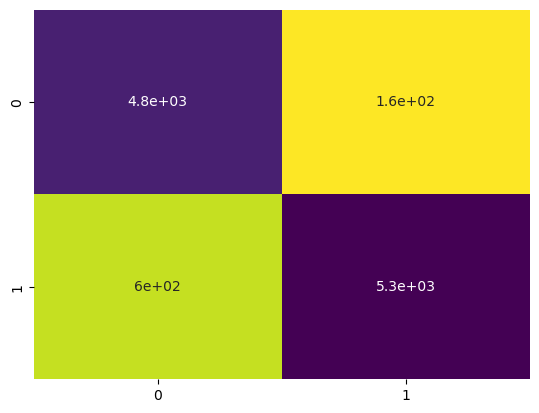

In [71]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(X_testing_prediction,Y_test) 
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=lps.classes_, xticklabels=lps.classes_)

In [72]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      5434
           1       0.90      0.97      0.93      5434

    accuracy                           0.93     10868
   macro avg       0.93      0.93      0.93     10868
weighted avg       0.93      0.93      0.93     10868



/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_58096/726444085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_58096/726444085.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

Text(0.5, 1.0, 'Random Forest ')

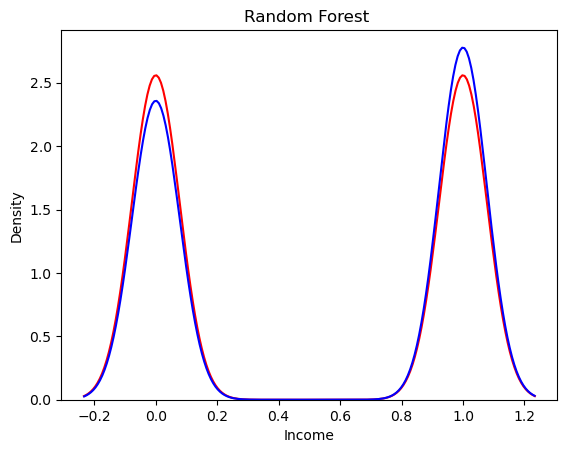

In [73]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Random Forest ')

# {0:<=50K,1:>50k}

In [78]:
# making a predictive System for testing the data 
# making a predictive System
input_data=X.iloc[597]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
#print(std_data)
std_data=Std.transform(std_data)
#print(std_data)
prediction=lps.predict(std_data)#model=RandomForest
print("target:",prediction)
if(prediction==0):
    print("Person Salary is lesser than or equal to 50k")
elif(prediction==1):
    print("Person Salary is Greater than 50K")


target: [1]
Person Salary is Greater than 50K


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [79]:
fp.head(600)

Age  workclass  fnlwgt  eduction  education_num  marital_status  \
0     39          7   77516         9             13               4   
1     50          6   83311         9             13               2   
2     38          4  215646        11              9               0   
3     53          4  234721         1              7               2   
4     28          4  338409         9             13               2   
..   ...        ...     ...       ...            ...             ...   
595   27          4  267147        11              9               4   
596   23          0   99399        15             10               4   
597   42          6  214242        14             15               2   
598   25          4  200408        15             10               4   
599   49          4  136455         9             13               4   

     occupation  relationship  race  sex  Capital_Gain  Capital_Loss  \
0             2             1     4    1          2174             0   
1             5             0     4    1             0             0   
2             7             1     4    1             0             0   
3             7             0     2    1             0             0   
4            11             5     2    0             0             0   
..          ...           ...   ...  ...           ...           ...   
595          13             3     4    1             0             0   
596           0             4     0    0             0             0   
597          11             0     4    1             0          1902   
598          14             1     4    1          2174             0   
599          11             1     4    0             0             0   

     hours_per_week  native_country  Income  
0                40              40       0  
1                13              40       0  
2                40              40       0  
3                40              40       0  
4                40               6       0  
..              ...             ...     ...  
595              40              40       0  
596              25              40       0  
597              50              40       1  
598              40              40       0  
599              45              40       0  

[600 rows x 15 columns]

In [80]:
Y.head(180)

0      0
1      0
2      0
3      0
4      0
      ..
175    0
176    0
177    0
178    0
179    0
Name: Income, Length: 180, dtype: int64

In [ ]:
X.head()